In [1]:
# import libs
import pandas as pd
import numpy as np

/home/irfan/.local/share/virtualenvs/pandas-IIxn-Q33/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Creating Objects

create series

In [2]:
s = pd.Series([1,3,5, np.nan, 6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

creating DataFrame from numpy data, custom index and columns

In [3]:
dates = pd.date_range("20220107", periods=6)
dates

DatetimeIndex(['2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2022-01-07,1.644992,0.408448,-1.336531,-0.862200
2022-01-08,0.698081,1.070447,0.096593,-0.500467
2022-01-09,1.081609,0.756175,1.191221,-0.060591
2022-01-10,0.757515,-1.374045,-0.178975,-0.710271
2022-01-11,0.197673,-1.166632,-0.651831,-1.776107
2022-01-12,-0.171080,-0.119366,2.025469,0.076191


creating DataFrame from Dictionary

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20220107"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3]*4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

,A,B,C,D,E,F
0,1.0,2022-01-07,1.0,3,test,foo
1,1.0,2022-01-07,1.0,3,train,foo
2,1.0,2022-01-07,1.0,3,test,foo
3,1.0,2022-01-07,1.0,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [7]:
df.head(2)

,A,B,C,D
2022-01-07,1.644992,0.408448,-1.336531,-0.862200
2022-01-08,0.698081,1.070447,0.096593,-0.500467


In [8]:
df.tail(3)

,A,B,C,D
2022-01-10,0.757515,-1.374045,-0.178975,-0.710271
2022-01-11,0.197673,-1.166632,-0.651831,-1.776107
2022-01-12,-0.171080,-0.119366,2.025469,0.076191


In [9]:
df.index

DatetimeIndex(['2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.to_numpy()

array([[ 1.6449917 ,  0.40844806, -1.33653127, -0.86220002],
       [ 0.69808072,  1.07044713,  0.09659303, -0.50046745],
       [ 1.08160905,  0.75617462,  1.19122081, -0.06059084],
       [ 0.7575149 , -1.37404535, -0.17897513, -0.71027064],
       [ 0.19767318, -1.16663219, -0.65183114, -1.77610696],
       [-0.1710802 , -0.11936582,  2.02546852,  0.07619133]])

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2022-01-07 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2022-01-07 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2022-01-07 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2022-01-07 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [14]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.701465,-0.070829,0.190991,-0.638907
std,0.640788,1.011698,1.229246,0.665305
min,-0.171080,-1.374045,-1.336531,-1.776107
25%,0.322775,-0.904816,-0.533617,-0.824218
50%,0.727798,0.144541,-0.041191,-0.605369
75%,1.000586,0.669243,0.917564,-0.170560
max,1.644992,1.070447,2.025469,0.076191


In [15]:
df2.T

,0,1,2,3
A,1.0,1.0,1.0,1.0
B,2022-01-07 00:00:00,2022-01-07 00:00:00,2022-01-07 00:00:00,2022-01-07 00:00:00
C,1.0,1.0,1.0,1.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [16]:
df.T

,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12
A,1.644992,0.698081,1.081609,0.757515,0.197673,-0.171080
B,0.408448,1.070447,0.756175,-1.374045,-1.166632,-0.119366
C,-1.336531,0.096593,1.191221,-0.178975,-0.651831,2.025469
D,-0.862200,-0.500467,-0.060591,-0.710271,-1.776107,0.076191


In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-01-07,-0.862200,-1.336531,0.408448,1.644992
2022-01-08,-0.500467,0.096593,1.070447,0.698081
2022-01-09,-0.060591,1.191221,0.756175,1.081609
2022-01-10,-0.710271,-0.178975,-1.374045,0.757515
2022-01-11,-1.776107,-0.651831,-1.166632,0.197673
2022-01-12,0.076191,2.025469,-0.119366,-0.171080


In [18]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2022-01-12,-0.171080,-0.119366,2.025469,0.076191
2022-01-11,0.197673,-1.166632,-0.651831,-1.776107
2022-01-10,0.757515,-1.374045,-0.178975,-0.710271
2022-01-09,1.081609,0.756175,1.191221,-0.060591
2022-01-08,0.698081,1.070447,0.096593,-0.500467
2022-01-07,1.644992,0.408448,-1.336531,-0.862200


In [19]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-01-07,-0.862200,-1.336531,0.408448,1.644992
2022-01-08,-0.500467,0.096593,1.070447,0.698081
2022-01-09,-0.060591,1.191221,0.756175,1.081609
2022-01-10,-0.710271,-0.178975,-1.374045,0.757515
2022-01-11,-1.776107,-0.651831,-1.166632,0.197673
2022-01-12,0.076191,2.025469,-0.119366,-0.171080


In [20]:
df.sort_values(by='B')

,A,B,C,D
2022-01-10,0.757515,-1.374045,-0.178975,-0.710271
2022-01-11,0.197673,-1.166632,-0.651831,-1.776107
2022-01-12,-0.171080,-0.119366,2.025469,0.076191
2022-01-07,1.644992,0.408448,-1.336531,-0.862200
2022-01-09,1.081609,0.756175,1.191221,-0.060591
2022-01-08,0.698081,1.070447,0.096593,-0.500467


## Getting

In [21]:
# getting a single column
df['A']

2022-01-07    1.644992
2022-01-08    0.698081
2022-01-09    1.081609
2022-01-10    0.757515
2022-01-11    0.197673
2022-01-12   -0.171080
Freq: D, Name: A, dtype: float64

In [22]:
df.A

2022-01-07    1.644992
2022-01-08    0.698081
2022-01-09    1.081609
2022-01-10    0.757515
2022-01-11    0.197673
2022-01-12   -0.171080
Freq: D, Name: A, dtype: float64

In [23]:
# slicing the rows
df[0:3]

,A,B,C,D
2022-01-07,1.644992,0.408448,-1.336531,-0.862200
2022-01-08,0.698081,1.070447,0.096593,-0.500467
2022-01-09,1.081609,0.756175,1.191221,-0.060591


In [24]:
df.index

DatetimeIndex(['2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12'],
              dtype='datetime64[ns]', freq='D')

In [25]:
df['20220107':'20220109']

,A,B,C,D
2022-01-07,1.644992,0.408448,-1.336531,-0.862200
2022-01-08,0.698081,1.070447,0.096593,-0.500467
2022-01-09,1.081609,0.756175,1.191221,-0.060591


### Selection by Label

In [26]:
df.loc[dates[0]]

A    1.644992
B    0.408448
C   -1.336531
D   -0.862200
Name: 2022-01-07 00:00:00, dtype: float64

In [27]:
# selecting on multi-axis by label
df.loc[:,['A','B']]
# first param is range of rows, 2nd param is labels of columns

,A,B
2022-01-07,1.644992,0.408448
2022-01-08,0.698081,1.070447
2022-01-09,1.081609,0.756175
2022-01-10,0.757515,-1.374045
2022-01-11,0.197673,-1.166632
2022-01-12,-0.171080,-0.119366


In [28]:
df.loc['20220107':'20220109', ['A','B']]

,A,B
2022-01-07,1.644992,0.408448
2022-01-08,0.698081,1.070447
2022-01-09,1.081609,0.756175


In [29]:
df.loc['20220110', ['A','B']]

A    0.757515
B   -1.374045
Name: 2022-01-10 00:00:00, dtype: float64

In [30]:
# getting a scalar value
df.loc[dates[0], 'A']

1.6449917019899898

In [31]:
# getting a scalar value
df.at[dates[0], 'A']  # fast method

1.6449917019899898

### Selection by Position

In [32]:
df.iloc[3]  # 3rd row from each column

A    0.757515
B   -1.374045
C   -0.178975
D   -0.710271
Name: 2022-01-10 00:00:00, dtype: float64

In [33]:
df.iloc[0:3, 0:2]

,A,B
2022-01-07,1.644992,0.408448
2022-01-08,0.698081,1.070447
2022-01-09,1.081609,0.756175


In [34]:
df.iloc[[1,2,4],[0,2,3]]

,A,C,D
2022-01-08,0.698081,0.096593,-0.500467
2022-01-09,1.081609,1.191221,-0.060591
2022-01-11,0.197673,-0.651831,-1.776107


In [35]:
df.iloc[1:3, : ]

,A,B,C,D
2022-01-08,0.698081,1.070447,0.096593,-0.500467
2022-01-09,1.081609,0.756175,1.191221,-0.060591


In [36]:
df.iloc[ : , 1:3]

,B,C
2022-01-07,0.408448,-1.336531
2022-01-08,1.070447,0.096593
2022-01-09,0.756175,1.191221
2022-01-10,-1.374045,-0.178975
2022-01-11,-1.166632,-0.651831
2022-01-12,-0.119366,2.025469


In [37]:
df.iat[1,1]

1.070447132996616

## Boolean Indexing

In [38]:
df[df['A']>0]

,A,B,C,D
2022-01-07,1.644992,0.408448,-1.336531,-0.862200
2022-01-08,0.698081,1.070447,0.096593,-0.500467
2022-01-09,1.081609,0.756175,1.191221,-0.060591
2022-01-10,0.757515,-1.374045,-0.178975,-0.710271
2022-01-11,0.197673,-1.166632,-0.651831,-1.776107


In [39]:
df[df>0]

,A,B,C,D
2022-01-07,1.644992,0.408448,NaN,NaN
2022-01-08,0.698081,1.070447,0.096593,NaN
2022-01-09,1.081609,0.756175,1.191221,NaN
2022-01-10,0.757515,NaN,NaN,NaN
2022-01-11,0.197673,NaN,NaN,NaN
2022-01-12,NaN,NaN,2.025469,0.076191


In [40]:
df3 = df.copy()

In [41]:
df3["E"] = ["one", "one", "two", "three", "four", "three"]

In [42]:
df3

,A,B,C,D,E
2022-01-07,1.644992,0.408448,-1.336531,-0.862200,one
2022-01-08,0.698081,1.070447,0.096593,-0.500467,one
2022-01-09,1.081609,0.756175,1.191221,-0.060591,two
2022-01-10,0.757515,-1.374045,-0.178975,-0.710271,three
2022-01-11,0.197673,-1.166632,-0.651831,-1.776107,four
2022-01-12,-0.171080,-0.119366,2.025469,0.076191,three


In [43]:
df3[df3['E'].isin(['two','four'])]

,A,B,C,D,E
2022-01-09,1.081609,0.756175,1.191221,-0.060591,two
2022-01-11,0.197673,-1.166632,-0.651831,-1.776107,four


## Setting

In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df["F"] = s1

In [47]:
# setting values by label
df.at[dates[0], "A"] = 0

In [48]:
df.iat[0, 1] = 0

In [49]:
df.loc[:, "D"] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D,F
2022-01-07,0.000000,0.000000,-1.336531,5,NaN
2022-01-08,0.698081,1.070447,0.096593,5,NaN
2022-01-09,1.081609,0.756175,1.191221,5,NaN
2022-01-10,0.757515,-1.374045,-0.178975,5,NaN
2022-01-11,0.197673,-1.166632,-0.651831,5,NaN
2022-01-12,-0.171080,-0.119366,2.025469,5,NaN


In [51]:
df3 = df.copy()
df3[df3 > 0] = -df3

In [52]:
df3

,A,B,C,D,F
2022-01-07,0.000000,0.000000,-1.336531,-5,NaN
2022-01-08,-0.698081,-1.070447,-0.096593,-5,NaN
2022-01-09,-1.081609,-0.756175,-1.191221,-5,NaN
2022-01-10,-0.757515,-1.374045,-0.178975,-5,NaN
2022-01-11,-0.197673,-1.166632,-0.651831,-5,NaN
2022-01-12,-0.171080,-0.119366,-2.025469,-5,NaN


## Missing Data

In [53]:
df

,A,B,C,D,F
2022-01-07,0.000000,0.000000,-1.336531,5,NaN
2022-01-08,0.698081,1.070447,0.096593,5,NaN
2022-01-09,1.081609,0.756175,1.191221,5,NaN
2022-01-10,0.757515,-1.374045,-0.178975,5,NaN
2022-01-11,0.197673,-1.166632,-0.651831,5,NaN
2022-01-12,-0.171080,-0.119366,2.025469,5,NaN


In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])

In [55]:
df1.loc[dates[0]:dates[1], ['E']] = 1

In [56]:
df1.loc[dates[0]:dates[1], ['F']] = 2

In [57]:
df1

,A,B,C,D,F,E
2022-01-07,0.000000,0.000000,-1.336531,5,2.0,1.0
2022-01-08,0.698081,1.070447,0.096593,5,2.0,1.0
2022-01-09,1.081609,0.756175,1.191221,5,NaN,NaN
2022-01-10,0.757515,-1.374045,-0.178975,5,NaN,NaN


In [58]:
df1.dropna(how='any')

,A,B,C,D,F,E
2022-01-07,0.000000,0.000000,-1.336531,5,2.0,1.0
2022-01-08,0.698081,1.070447,0.096593,5,2.0,1.0


In [59]:
df1.fillna(value='5')

,A,B,C,D,F,E
2022-01-07,0.000000,0.000000,-1.336531,5,2.0,1.0
2022-01-08,0.698081,1.070447,0.096593,5,2.0,1.0
2022-01-09,1.081609,0.756175,1.191221,5,5,5
2022-01-10,0.757515,-1.374045,-0.178975,5,5,5


In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2022-01-07,False,False,False,False,False,False
2022-01-08,False,False,False,False,False,False
2022-01-09,False,False,False,False,True,True
2022-01-10,False,False,False,False,True,True


In [61]:
pd.isna(df)

,A,B,C,D,F
2022-01-07,False,False,False,False,True
2022-01-08,False,False,False,False,True
2022-01-09,False,False,False,False,True
2022-01-10,False,False,False,False,True
2022-01-11,False,False,False,False,True
2022-01-12,False,False,False,False,True


## Operations

### Stats

In [62]:
df.mean()

A    0.427300
B   -0.138904
C    0.190991
D    5.000000
F         NaN
dtype: float64

In [63]:
df.mean(1)

2022-01-07    0.915867
2022-01-08    1.716280
2022-01-09    2.007251
2022-01-10    1.051124
2022-01-11    0.844802
2022-01-12    1.683756
Freq: D, dtype: float64

In [64]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s

2022-01-07    NaN
2022-01-08    NaN
2022-01-09    1.0
2022-01-10    3.0
2022-01-11    5.0
2022-01-12    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis='index')

,A,B,C,D,F
2022-01-07,NaN,NaN,NaN,NaN,NaN
2022-01-08,NaN,NaN,NaN,NaN,NaN
2022-01-09,0.081609,-0.243825,0.191221,4.0,NaN
2022-01-10,-2.242485,-4.374045,-3.178975,2.0,NaN
2022-01-11,-4.802327,-6.166632,-5.651831,0.0,NaN
2022-01-12,NaN,NaN,NaN,NaN,NaN


### Applying functions to Data

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2022-01-07,0.000000,0.000000,-1.336531,5,NaN
2022-01-08,0.698081,1.070447,-1.239938,10,NaN
2022-01-09,1.779690,1.826622,-0.048717,15,NaN
2022-01-10,2.537205,0.452576,-0.227693,20,NaN
2022-01-11,2.734878,-0.714056,-0.879524,25,NaN
2022-01-12,2.563798,-0.833422,1.145945,30,NaN


In [67]:
df.apply(lambda x: x.max()-x.min())

A    1.252689
B    2.444492
C    3.362000
D    0.000000
F         NaN
dtype: float64

### Histogramming

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    4
1    5
2    2
3    1
4    6
5    6
6    5
7    5
8    6
9    6
dtype: int64

In [70]:
s.value_counts()

6    4
5    3
4    1
2    1
1    1
dtype: int64

### String Methods

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [78]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.230262,0.101778,-0.144480,0.045979
1,-0.869894,0.074617,-0.070025,1.341200
2,-0.338724,-0.732765,-1.767771,-0.515551
3,-0.554461,-0.350884,-0.786072,-0.584320
4,-0.166736,0.510405,0.162229,-1.176011
5,1.915831,-0.934322,0.572086,-0.594436
6,-0.423406,1.753879,0.016636,0.175163
7,1.342534,-0.912945,0.931879,-0.075297
8,-1.498498,0.109398,1.559245,-0.930573
9,-1.194653,2.440669,0.709356,0.234044


In [79]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.230262  0.101778 -0.144480  0.045979
 1 -0.869894  0.074617 -0.070025  1.341200
 2 -0.338724 -0.732765 -1.767771 -0.515551,
           0         1         2         3
 3 -0.554461 -0.350884 -0.786072 -0.584320
 4 -0.166736  0.510405  0.162229 -1.176011
 5  1.915831 -0.934322  0.572086 -0.594436
 6 -0.423406  1.753879  0.016636  0.175163,
           0         1         2         3
 7  1.342534 -0.912945  0.931879 -0.075297
 8 -1.498498  0.109398  1.559245 -0.930573
 9 -1.194653  2.440669  0.709356  0.234044]

In [80]:
pd.concat(pieces)

,0,1,2,3
0,-0.230262,0.101778,-0.144480,0.045979
1,-0.869894,0.074617,-0.070025,1.341200
2,-0.338724,-0.732765,-1.767771,-0.515551
3,-0.554461,-0.350884,-0.786072,-0.584320
4,-0.166736,0.510405,0.162229,-1.176011
5,1.915831,-0.934322,0.572086,-0.594436
6,-0.423406,1.753879,0.016636,0.175163
7,1.342534,-0.912945,0.931879,-0.075297
8,-1.498498,0.109398,1.559245,-0.930573
9,-1.194653,2.440669,0.709356,0.234044


In [81]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [82]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [83]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Grouping

In [84]:
df = pd.DataFrame(

    {

        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],

        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],

        "C": np.random.randn(8),

        "D": np.random.randn(8),

    }

)



df

,A,B,C,D
0,foo,one,0.018876,-0.026946
1,bar,one,-0.691779,-0.608831
2,foo,two,0.751905,1.042611
3,bar,three,1.020443,-1.241081
4,foo,two,-1.305204,0.707488
5,bar,two,0.290812,0.062034
6,foo,one,0.277063,-0.304788
7,foo,three,0.511514,0.306991


In [85]:
df.groupby('A').sum()

,C,D
A,,
bar,0.619475,-1.787878
foo,0.254153,1.725356


In [86]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -0.691779 -0.608831
    three  1.020443 -1.241081
    two    0.290812  0.062034
foo one    0.295939 -0.331734
    three  0.511514  0.306991
    two   -0.553299  1.750099

## Reshaping

### Stack

In [87]:
tuples = list(

    zip(

        *[

            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],

            ["one", "two", "one", "two", "one", "two", "one", "two"],

        ]

    )

)

In [88]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [89]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [90]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -1.975308  0.175478
      two    -0.258408 -0.351850
baz   one     1.229754  2.709425
      two    -1.769709  0.008663
foo   one    -1.316171  0.335102
      two     0.005404  0.218641
qux   one     0.593316  1.282887
      two     0.486854  0.031450

In [91]:
df2 = df[:4]

df2

A         B
first second                    
bar   one    -1.975308  0.175478
      two    -0.258408 -0.351850
baz   one     1.229754  2.709425
      two    -1.769709  0.008663

In [92]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.975308
               B    0.175478
       two     A   -0.258408
               B   -0.351850
baz    one     A    1.229754
               B    2.709425
       two     A   -1.769709
               B    0.008663
dtype: float64

In [93]:
stacked.unstack()

A         B
first second                    
bar   one    -1.975308  0.175478
      two    -0.258408 -0.351850
baz   one     1.229754  2.709425
      two    -1.769709  0.008663

In [94]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.975308 -0.258408
      B  0.175478 -0.351850
baz   A  1.229754 -1.769709
      B  2.709425  0.008663

In [95]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.975308  1.229754
       B  0.175478  2.709425
two    A -0.258408 -1.769709
       B -0.351850  0.008663

### Pivot Tables

In [96]:
df = pd.DataFrame(

    {

        "A": ["one", "one", "two", "three"] * 3,

        "B": ["A", "B", "C"] * 4,

        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,

        "D": np.random.randn(12),

        "E": np.random.randn(12),

    }

)



df

,A,B,C,D,E
0,one,A,foo,1.127465,-1.365911
1,one,B,foo,0.362592,0.328598
2,two,C,foo,0.817636,0.747720
3,three,A,bar,0.717662,0.383075
4,one,B,bar,-0.996772,-0.816262
5,one,C,bar,0.625885,-0.675080
6,two,A,foo,-0.565328,0.679016
7,three,B,foo,0.564376,-0.693278
8,one,C,foo,0.326621,0.867988
9,one,A,bar,-1.411222,0.378767


In [100]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.411222  1.127465
      B -0.996772  0.362592
      C  0.625885  0.326621
three A  0.717662       NaN
      B       NaN  0.564376
      C  0.135907       NaN
two   A       NaN -0.565328
      B  0.551436       NaN
      C       NaN  0.817636

## Time Series

In [101]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [102]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00    349
2012-01-01 00:00:01    102
2012-01-01 00:00:02    122
2012-01-01 00:00:03     81
2012-01-01 00:00:04    443
                      ... 
2012-01-01 00:01:35    205
2012-01-01 00:01:36    330
2012-01-01 00:01:37    323
2012-01-01 00:01:38    451
2012-01-01 00:01:39    435
Freq: S, Length: 100, dtype: int64

In [103]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [104]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.294891
2012-03-07    1.299955
2012-03-08   -1.010459
2012-03-09    0.048964
2012-03-10   -0.640551
Freq: D, dtype: float64

In [108]:
ts_lc = ts.tz_localize("UTC")

In [109]:
ts_lc

2012-03-06 00:00:00+00:00    0.294891
2012-03-07 00:00:00+00:00    1.299955
2012-03-08 00:00:00+00:00   -1.010459
2012-03-09 00:00:00+00:00    0.048964
2012-03-10 00:00:00+00:00   -0.640551
Freq: D, dtype: float64

In [110]:
ts_lc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.294891
2012-03-06 19:00:00-05:00    1.299955
2012-03-07 19:00:00-05:00   -1.010459
2012-03-08 19:00:00-05:00    0.048964
2012-03-09 19:00:00-05:00   -0.640551
Freq: D, dtype: float64

In [111]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31   -0.630090
2012-02-29    1.027783
2012-03-31    1.649311
2012-04-30   -1.314611
2012-05-31   -0.690960
Freq: M, dtype: float64

In [112]:
ps = ts.to_period()

In [113]:
ps

2012-01   -0.630090
2012-02    1.027783
2012-03    1.649311
2012-04   -1.314611
2012-05   -0.690960
Freq: M, dtype: float64

In [114]:
ps.to_timestamp()

2012-01-01   -0.630090
2012-02-01    1.027783
2012-03-01    1.649311
2012-04-01   -1.314611
2012-05-01   -0.690960
Freq: MS, dtype: float64

In [117]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [118]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    1.582743
1990Q2    0.044580
1990Q3   -0.860584
1990Q4    0.384264
1991Q1   -0.173303
1991Q2   -0.868760
1991Q3    0.142177
1991Q4   -0.605482
1992Q1   -0.572547
1992Q2   -1.146820
1992Q3   -0.345740
1992Q4    0.456636
1993Q1   -0.168809
1993Q2   -1.653464
1993Q3    0.299776
1993Q4    1.334326
1994Q1   -0.353932
1994Q2    1.103138
1994Q3   -1.643150
1994Q4   -0.132423
1995Q1    0.314575
1995Q2    0.503412
1995Q3   -0.365385
1995Q4   -1.746137
1996Q1   -0.629013
1996Q2    0.217901
1996Q3   -0.475781
1996Q4   -0.625081
1997Q1   -2.076292
1997Q2    0.214714
1997Q3   -0.493261
1997Q4    1.447949
1998Q1    1.441184
1998Q2    0.839150
1998Q3    0.492633
1998Q4    0.966264
1999Q1    3.130037
1999Q2    0.685626
1999Q3   -0.533019
1999Q4    1.679216
2000Q1    0.621346
2000Q2   -1.661932
2000Q3    0.111811
2000Q4   -1.630320
Freq: Q-NOV, dtype: float64

In [119]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9


In [120]:
ts.head()

1990-03-01 09:00    1.582743
1990-06-01 09:00    0.044580
1990-09-01 09:00   -0.860584
1990-12-01 09:00    0.384264
1991-03-01 09:00   -0.173303
Freq: H, dtype: float64

## Categorical

In [121]:
df = pd.DataFrame(

    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}

)

In [122]:
df['grade'] = df['raw_grade'].astype("category")

In [123]:
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [124]:
df['grade'].cat.categories = ["very good", "good", "very bad"]

In [125]:
df['grade'] = df['grade'].cat.set_categories(

    ["very bad", "bad", "medium", "good", "very good"]

)

In [126]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [127]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [128]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [129]:
import matplotlib.pyplot as plt

In [130]:
plt.close('all')

In [131]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts.cumsum()

2000-01-01    -0.392576
2000-01-02    -0.922768
2000-01-03    -0.729051
2000-01-04    -1.113132
2000-01-05    -1.158925
                ...    
2002-09-22   -18.967954
2002-09-23   -20.036371
2002-09-24   -19.839283
2002-09-25   -18.656890
2002-09-26   -18.980772
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

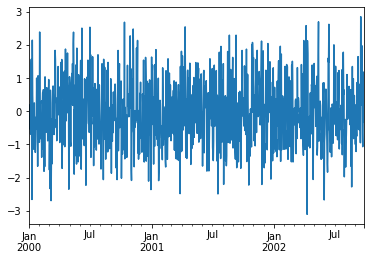

In [132]:
ts.plot()

<Figure size 432x288 with 0 Axes>

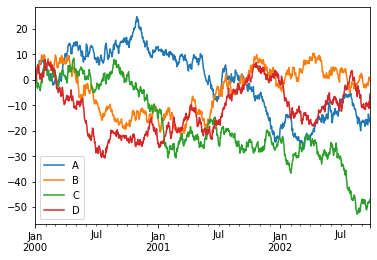

In [133]:
df = pd.DataFrame(

    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]

)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

In [134]:
df.to_csv('10mnts.csv')

In [135]:
pd.read_csv('10mnts.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.311029,1.165164,0.621973,0.772524
1,2000-01-02,1.514992,2.251302,-0.390415,0.616188
2,2000-01-03,3.838315,1.331389,1.473843,-0.310852
3,2000-01-04,3.771874,1.158184,1.355624,1.971318
4,2000-01-05,2.900648,1.845476,0.773203,2.011416
...,...,...,...,...,...
995,2002-09-22,-13.848174,0.224825,-47.774313,-8.806841
996,2002-09-23,-14.991675,1.045083,-47.887543,-11.215251
997,2002-09-24,-15.866346,1.101336,-48.271662,-9.229612
998,2002-09-25,-16.599720,0.383667,-47.548472,-7.247509


In [137]:
df.to_hdf('10mnts.h5', 'df')

In [139]:
pd.read_hdf("10mnts.h5", "df")

,A,B,C,D
2000-01-01,1.311029,1.165164,0.621973,0.772524
2000-01-02,1.514992,2.251302,-0.390415,0.616188
2000-01-03,3.838315,1.331389,1.473843,-0.310852
2000-01-04,3.771874,1.158184,1.355624,1.971318
2000-01-05,2.900648,1.845476,0.773203,2.011416
...,...,...,...,...
2002-09-22,-13.848174,0.224825,-47.774313,-8.806841
2002-09-23,-14.991675,1.045083,-47.887543,-11.215251
2002-09-24,-15.866346,1.101336,-48.271662,-9.229612
2002-09-25,-16.599720,0.383667,-47.548472,-7.247509


In [142]:
df.to_excel("10mnts.xlsx", sheet_name="Sheet1")

In [144]:
pd.read_excel("10mnts.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.311029,1.165164,0.621973,0.772524
1,2000-01-02,1.514992,2.251302,-0.390415,0.616188
2,2000-01-03,3.838315,1.331389,1.473843,-0.310852
3,2000-01-04,3.771874,1.158184,1.355624,1.971318
4,2000-01-05,2.900648,1.845476,0.773203,2.011416
...,...,...,...,...,...
995,2002-09-22,-13.848174,0.224825,-47.774313,-8.806841
996,2002-09-23,-14.991675,1.045083,-47.887543,-11.215251
997,2002-09-24,-15.866346,1.101336,-48.271662,-9.229612
998,2002-09-25,-16.599720,0.383667,-47.548472,-7.247509


Done with 10 minutes to Pandas